Import Libraries

In [1]:

import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')


Import keyword data

In [2]:
keyword_df = pd.read_csv('PM_Keywords_granular.csv')


In [3]:
keyword_df.head()

,Unnamed: 0,keyword,Score,POS,job_ID,Company,Title,query,time
0,0,challenges,0.105,Noun,1,Family Service League,IT Project Manager,IT Project Manager,2020-02-10 21:09:49.586156
1,1,standards,0.101,Noun,1,Family Service League,IT Project Manager,IT Project Manager,2020-02-10 21:09:49.586156
2,2,determine,0.096,Noun,1,Family Service League,IT Project Manager,IT Project Manager,2020-02-10 21:09:49.586156
3,3,tasks,0.095,Noun,1,Family Service League,IT Project Manager,IT Project Manager,2020-02-10 21:09:49.586156
4,4,coordinate,0.095,Noun,1,Family Service League,IT Project Manager,IT Project Manager,2020-02-10 21:09:49.586156


Import csv with count of keywords

In [4]:
keyword_summary_df = pd.read_csv('PM_Keywords_summary.csv')
keyword_summary_df.head()

,Unnamed: 0,keyword,POS,time,query,keyword_count
0,148,internal,Adjective,2020-02-10 21:09:49.586156,IT Project Manager,10
1,353,technical,Adjective,2020-02-10 21:09:49.586156,IT Project Manager,9
2,294,schedules,Noun,2020-02-10 21:09:49.586156,IT Project Manager,6
3,58,create,Noun,2020-02-10 21:09:49.586156,IT Project Manager,6
4,325,standards,Noun,2020-02-10 21:09:49.586156,IT Project Manager,6


Import Job Salaries (manually looked up on indeed)

In [5]:
salary_df = pd.read_csv('job_avg_salaries.csv')

In [6]:
salary_df

,Job_Tittle,Domain,Date,Avg_Salary
0,Technology Project Manager,Information Technology,2020-02-09,103175
1,Technology Product Manager,Information Technology,2020-02-09,106838
2,Data Scientist,Information Technology,2020-02-09,123253
3,DevOps Engineer,Information Technology,2020-02-09,126982
4,Software Engineer,Information Technology,2020-02-09,107254
5,Data Engineer,Information Technology,2020-02-09,127179
6,Solutions Architect,Information Technology,2020-02-09,139443
7,Data Analyst,Information Technology,2020-02-09,71274
8,Full Stack Developer,Information Technology,2020-02-09,113481
9,Development Manager,Information Technology,2020-02-09,143371


In [7]:
top_50_keywords = keyword_summary_df["keyword"][:50].tolist()
top_50_keywords

['internal',
 'technical',
 'schedules',
 'create',
 'standards',
 'shared internal',
 'updates consistent',
 'partners subject',
 'matter authorities',
 'coordinates',
 'parties vendors',
 'coordinate',
 'manager operations',
 'possess',
 'vendors flawless',
 'seeing projects',
 'manager needed',
 'determine',
 'key partners',
 'implementation management',
 'needed',
 'timelines',
 'expected',
 'executive management',
 'stakeholders strategy',
 'timeline hire',
 'track costs',
 'erp manager',
 'future processes',
 'erp',
 'needed manage',
 'netsuite',
 'strong familiarity',
 'software tools',
 'functionality',
 'type renewal',
 'strategy adjustments',
 'resources parties',
 'procedure',
 'reasonable accommodation',
 'internal resources',
 'accommodation',
 'progress',
 'report escalate',
 'assistance manager',
 'challenges',
 'tasks',
 'knowledgeable microsoft',
 'adjustments',
 'issues management']

Filter only the top keywords

In [8]:

keyword_df= keyword_df[keyword_df['keyword'].isin(top_50_keywords)]

Calculate job ID Score for the top 50 keywords for a given job 

In [9]:
job_id_scores_df = pd.DataFrame()
job_id_scores_df= keyword_df[['job_ID','Company', 'Score']]
job_id_scores_df = job_id_scores_df.groupby(['job_ID','Company'], as_index=False)['Score'].agg({"sum": "sum"}).sort_values(['sum'], ascending=False)
job_id_scores_df.head()

,job_ID,Company,sum
32,87,Amplify Education,1.193
31,73,Amplify Education,1.193
6,19,Amplify Education,1.193
7,20,Amplify Education,1.193
24,56,Amplify Education,1.193


Build out sparse matrix with keywords as a columns

In [10]:
df2 = pd.get_dummies(keyword_df['keyword']).to_sparse(0)
df2['job_ID'] = keyword_df['job_ID']
df2['Company'] = keyword_df['Company']
df2['Title'] = keyword_df['Title']
df2['Score'] = keyword_df['Score']

df2.head()

C:\Users\doug\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: DataFrame.to_sparse is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\generic.py:8681: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  ranks = self._constructor(ranks, **data._construct_a

,accommodation,adjustments,assistance manager,challenges,coordinate,coordinates,create,determine,erp,erp manager,...,timelines,track costs,type renewal,updates consistent,vendors flawless,job_ID,Company,Title,Score,Rank
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,Family Service League,IT Project Manager,0.105,4.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Family Service League,IT Project Manager,0.101,5.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,Family Service League,IT Project Manager,0.096,8.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Family Service League,IT Project Manager,0.095,9.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,Family Service League,IT Project Manager,0.095,9.0


In [18]:
feature_matrix = df2.groupby(['job_ID'], as_index=False).sum()
feature_matrix ["Rank"] = feature_matrix ["Score"].rank(method='dense', ascending=False) 
feature_matrix.to_csv('feature_matrix.csv')
feature_matrix

C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\sparse\frame.py:745: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self._default_fill_value,
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\generic.py:3606: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  result = self._constructor(new_data).__finalize__(self)
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.py

,job_ID,accommodation,adjustments,assistance manager,challenges,coordinate,coordinates,create,determine,erp,...,timeline hire,timelines,track costs,type renewal,updates consistent,vendors flawless,Company,Title,Score,Rank
0,1,0,0,0,1,1,0,1,1,0,...,0,1,0,0,0,0,Family Service LeagueFamily Service LeagueFami...,IT Project ManagerIT Project ManagerIT Project...,0.917,3.0
1,5,0,1,0,0,0,0,0,0,0,...,1,0,1,1,1,0,Combined Computer ResourcesCombined Computer R...,Project Manager with a Big data backgroundProj...,1.053,2.0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,Leukemia & Lymphoma SocietyLeukemia & Lymphoma...,IT Project ManagerIT Project ManagerIT Project...,0.819,4.0
3,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,Memorial Sloan-Kettering Cancer CenterMemorial...,Project Manager - Translational InformaticsPro...,0.167,7.0
4,17,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Oneida Nation EnterprisesOneida Nation Enterpr...,IT Project Manager - Junior or SeniorIT Projec...,0.817,5.0
5,18,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Oneida Nation EnterprisesOneida Nation Enterpr...,IT Project Manager - Junior or SeniorIT Projec...,0.817,5.0
6,19,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,Amplify EducationAmplify EducationAmplify Educ...,ERP Project ManagerERP Project ManagerERP Proj...,1.193,1.0
7,20,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,Amplify EducationAmplify EducationAmplify Educ...,ERP Project ManagerERP Project ManagerERP Proj...,1.193,1.0
8,22,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,Oneida Nation EnterprisesOneida Nation Enterpr...,IT Project Manager - Junior or SeniorIT Projec...,0.817,5.0
9,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,New York Cruise LinesNew York Cruise Lines,Technical Project ManagerTechnical Project Man...,0.158,8.0


Prepare X and Y values for regression

In [36]:
Y = feature_matrix['Rank']
X = feature_matrix[[x for x in feature_matrix.columns if x != 'job_ID' and x != 'Rank'and x != 'Company'and x != 'Title'and x != 'Score']]
#X = sm.add_constant(X)

C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\generic.py:3606: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  result = self._constructor(new_data).__finalize__(self)


In [37]:
Y.head()

C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\sparse\series.py:346: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  self._data.get_slice(indexer), fastpath=True


0    3.0
1    2.0
2    4.0
3    7.0
4    5.0
Name: Rank, dtype: Sparse[float64, nan]
BlockIndex
Block locations: array([0])
Block lengths: array([5])

In [38]:
X.head()

C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\frame.py:3471: FutureWarning: SparseSeries is deprecated and will be removed in a future version.
Use a Series with sparse values instead.

    >>> series = pd.Series(pd.SparseArray(...))

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  return klass(values, index=self.index, name=items, fastpath=True)
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\sparse\frame.py:745: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See http://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html#migrating for more.

  default_fill_value=self._default_fill_value,
C:\Users\doug\Anaconda3\lib\site-packages\pandas\core\sparse\frame.py:721: FutureWarning: SparseDataFrame is deprecated and will be removed in a future version.
Use a regular DataFrame whose columns are SparseArrays instead.

See ht

,accommodation,adjustments,assistance manager,challenges,coordinate,coordinates,create,determine,erp,erp manager,...,strategy adjustments,strong familiarity,tasks,technical,timeline hire,timelines,track costs,type renewal,updates consistent,vendors flawless
0,0,0,0,1,1,0,1,1,0,0,...,0,0,1,1,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Conjoint Analysis

https://ariepratama.github.io/How-to-do-conjoint-analysis-in-python/

In [42]:
res = sm.OLS(Y, X, family=sm.families.Binomial()).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1068.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           2.23e-32
Time:                        13:51:09   Log-Likelihood:                 19.434
No. Observations:                  38   AIC:                            -16.87
Df Residuals:                      27   BIC:                             1.145
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
accommodation                 3.1000      0.038     80.540      0.000       3.021       3.179
adjustments                   0.2000      0.008     25.981      0.000       0.184       0.216
assistance manager           -0.6250      0.024    -26.517      0.000      -0.673      -0.577
challenges                   -2.1429      0.046    -46.916      0.000      -2.237      -2.049
coordinate                   -2.1429      0.046    -46.916      0.000      -2.237      -2.049
coordinates                  -0.6250      0.024    -26.517      0.000      -0.673      -0.577
create                        9.0000      0.172     52.285      0.000       8.647       9.353
determine                    -2.1429      0.046    -46.916      0.000      -2.237      -2.049
erp                           0.1000      0.008     12.990      0.000       0.084       0.116
erp manager                   0.1000      0.008     12.990      0.000       0.084       0.116
executive management         -0.6250      0.024    -26.517      0.000      -0.673      -0.577
expected                     -0.6250      0.024    -26.517      0.000      -0.673      -0.577
functionality                 0.1000      0.008     12.990      0.000       0.084       0.116
future processes              0.1000      0.008     12.990      0.000       0.084       0.116
implementation management     0.1000      0.008     12.990      0.000       0.084       0.116
internal                     11.0000      0.172     63.904      0.000      10.647      11.353
internal resources           -0.8750      0.024    -37.123      0.000      -0.923      -0.827
issues management            -0.8750      0.024    -37.123      0.000      -0.923      -0.827
key partners                  0.1000      0.008     12.990      0.000       0.084       0.116
knowledgeable microsoft      -0.6250      0.024    -26.517      0.000      -0.673      -0.577
manager needed               -0.6250      0.024    -26.517      0.000      -0.673      -0.577
manager operations            0.1000      0.008     12.990      0.000       0.084       0.116
matter authorities            0.1000      0.008     12.990      0.000       0.084       0.116
needed                       -0.6250      0.024    -26.517      0.000      -0.673      -0.577
needed manage                -0.8750      0.024    -37.123      0.000      -0.923      -0.827
netsuite                      0.1000      0.008     12.990      0.000       0.084       0.116
parties vendors              -0.8750      0.024    -37.123      0.000      -0.923      -0.827
partners subject              0.1000      0.008     12.990      0.000       0.084       0.116
possess                      -2.1429      0.046    -46.916      0.000      -2.237      -2.049
procedure                    -0.6250      0.024    -26.517      0.000      

In [43]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)

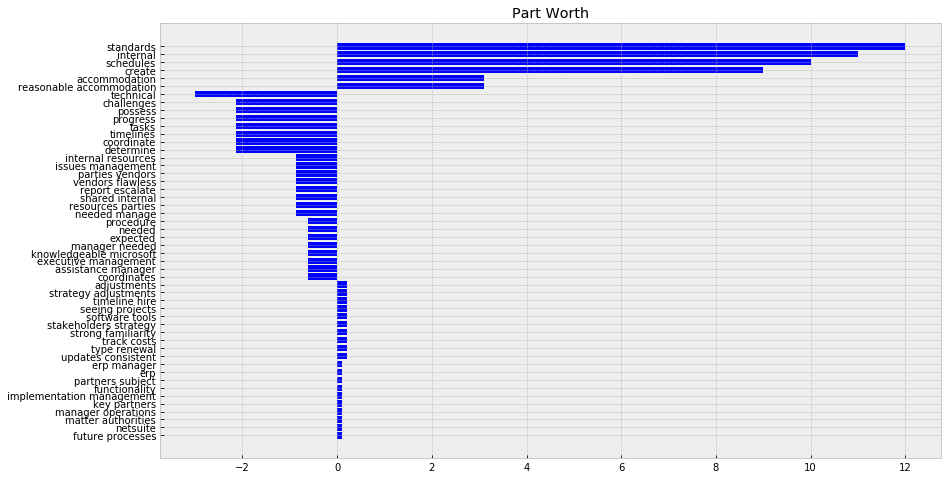

In [44]:
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

In [45]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()
        
    range_per_feature[feature].append(coeff)

In [48]:
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing 
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
importance_per_feature

{'accommodation': 0.0,
 'adjustments': 0.0,
 'assistance manager': 0.0,
 'challenges': 0.0,
 'coordinate': 0.0,
 'coordinates': 0.0,
 'create': 0.0,
 'determine': 0.0,
 'erp': 0.0,
 'erp manager': 0.0,
 'executive management': 0.0,
 'expected': 0.0,
 'functionality': 0.0,
 'future processes': 0.0,
 'implementation management': 0.0,
 'internal': 0.0,
 'internal resources': 0.0,
 'issues management': 0.0,
 'key partners': 0.0,
 'knowledgeable microsoft': 0.0,
 'manager needed': 0.0,
 'manager operations': 0.0,
 'matter authorities': 0.0,
 'needed': 0.0,
 'needed manage': 0.0,
 'netsuite': 0.0,
 'parties vendors': 0.0,
 'partners subject': 0.0,
 'possess': 0.0,
 'procedure': 0.0,
 'progress': 0.0,
 'reasonable accommodation': 0.0,
 'report escalate': 0.0,
 'resources parties': 0.0,
 'schedules': 0.0,
 'seeing projects': 0.0,
 'shared internal': 0.0,
 'software tools': 0.0,
 'stakeholders strategy': 0.0,
 'standards': 0.0,
 'strategy adjustments': 0.0,
 'strong familiarity': 0.0,
 'tasks':

In [ ]:
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}